<a href="https://colab.research.google.com/github/debarupa28/bharat_intern_task/blob/main/Task4(email_spam_detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/spam.csv",encoding="latin-1",usecols=["v1","v2"])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will è b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.rename(columns={"v1":"Category","v2":"Message"},inplace=True)
df

,Ctegory,Massage,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will 蘝 b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
#importing  label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Ctegory"]= le.fit_transform(df["Ctegory"])
df

,Ctegory,Massage,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will 蘝 b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ctegory     5572 non-null   int64 
 1   Massage     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


In [ ]:
df.isnull().sum()

Ctegory          0
Massage          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.duplicated().sum()

409

In [ ]:
df.drop_duplicates(keep="first")


,Ctegory,Massage,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will 蘝 b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df["Ctegory"].value_counts()

Ctegory
0    4825
1     747
Name: count, dtype: int64

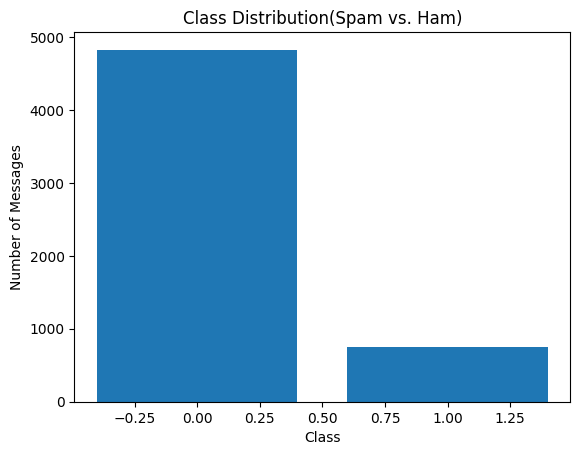

In [ ]:
class_counts=df['Ctegory'].value_counts()
plt.bar(class_counts.index,class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Messages')
plt.title('Class Distribution(Spam vs. Ham)')
plt.show()

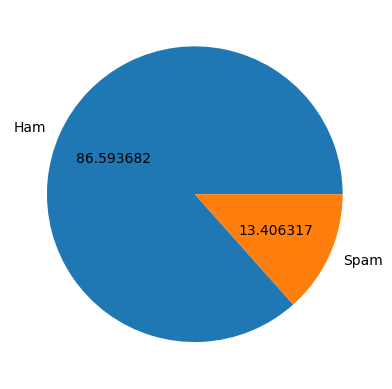

In [ ]:
plt.pie(df["Ctegory"].value_counts(),autopct="%2f",labels=['Ham','Spam'])
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

for val in df.Massage:
    val = str(val)
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 600,
                background_color ='#f8f8ff',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

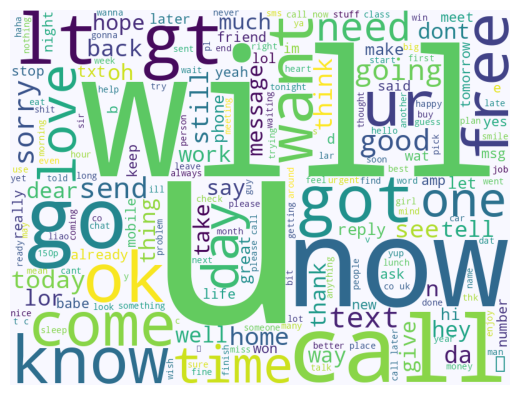

In [ ]:
plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
x=df['Massage']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will 蘝 b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Massage, Length: 5572, dtype: object

In [ ]:
y = df["Ctegory"]
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Ctegory, Length: 5572, dtype: int64

In [ ]:
# Importing train test split library
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train)

X_train_cv = vectorizer.transform(x_train)
X_test_cv = vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train_cv,y_train)

LogisticRegression()

In [ ]:
y_pred=logreg.predict(X_test_cv)
print('Accuracy of logistic regression classifier on test set:{:.2f}'.format(logreg.score(X_test_cv,y_test)))

Accuracy of logistic regression classifier on test set:0.98


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[965   0]
 [ 24 126]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:",f1)

Accuracy: 0.97847533632287
Precision: 1.0
Recall: 0.84
F1 score: 0.9130434782608696


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Using MultinomialNB for prediction Custom words
classifier = MultinomialNB()
classifier.fit(X_train_cv,y_train)

MultinomialNB()

In [ ]:
custom_word = "Offer for internship"
custom_word_vec = vectorizer.transform([custom_word])
prediction = classifier.predict(custom_word_vec)[0]

if prediction == 1:
    prediction = "Spam"
else:
    prediction = "Ham"

print(f"Custom word '{custom_word}' is predicted as:{prediction}")

Custom word 'Offer for internship' is predicted as:Spam
